In [28]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [29]:
state_abbreviations = {
    'AL': 'Alabama',
    'AK': 'Alaska',
    'AZ': 'Arizona',
    'AR': 'Arkansas',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'IA': 'Iowa',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MS': 'Mississippi',
    'MO': 'Missouri',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming', 
    'Washington, DC': 'MD',
    'Long Island-Queens': 'NY', 
    'Township of Lawrence': 'NJ',
    'Manhattan': 'NY',
    'New York State': 'NY',
    'Texhoma': "OK", 
    "United States": "WA"
}
reverse_abbrev = {value:key for (key, value) in state_abbreviations.items()}

In [30]:
job_postings = pd.read_csv("clean_job_postings_w_salary.csv").drop(columns = ['Unnamed: 0'])

In [31]:
job_postings['salary estimate'].apply(lambda x: x.replace("(est.)", '').strip()[-3:]).unique()

array(['/yr', '/hr', '/mo'], dtype=object)

In [32]:
def clean_estimate(estimate):
    estimate = estimate.replace("(est.)", '').replace("$", '').strip()
    suffix = estimate[-4:]
    estimate_int = float(estimate[:-3])
    if "/mo" in suffix:
        return 12 * estimate_int
    elif "/hr" in suffix:
        return estimate_int * 2000
    else:
        return estimate_int

In [33]:
job_postings['salary estimate'] = job_postings['salary estimate'].apply(clean_estimate)

In [34]:
job_postings.groupby("location")['salary estimate'].mean()

location
Abbott Park, IL       102372.000000
Alameda, CA           160000.000000
Albany, NY             68617.000000
Alexandria, VA        112443.857143
Alpharetta, GA        140500.000000
                          ...      
Wilmington, MA        114397.000000
Wisconsin             125350.000000
Woodbridge, NJ         98694.000000
Woodcliff Lake, NJ     81136.000000
Youngsville, LA        77299.000000
Name: salary estimate, Length: 240, dtype: float64

In [35]:
def create_state_col(location):
    exclusion_lst = ['Remote', 'United States', 'San Juan, PR']
    if location not in exclusion_lst:
        if location[-2:] in state_abbreviations:
            return location[-2:]
        elif location in state_abbreviations:
            return state_abbreviations[location]
        elif location in reverse_abbrev:
            return reverse_abbrev[location]
    return "None"

In [36]:
job_postings['state'] = job_postings['location'].apply(create_state_col)

In [37]:
temp_jp = job_postings[job_postings['state'] != "None"]
data = temp_jp.groupby('state')['salary'].mean().reset_index()

In [38]:
data

,state,salary
0,AL,53877.000000
1,AR,64562.500000
2,AZ,76347.560000
3,CA,128569.560000
4,CO,108270.300000
5,CT,128590.000000
6,DE,78724.666667
7,FL,84523.210526
8,GA,101447.375000
9,IA,83582.200000


In [39]:
# Create a choropleth map using plotly.graph_objects
data['Full_state'] = data['state'].map(state_abbreviations)

fig = go.Figure(go.Choropleth(
    locations=data['state'],
    z=data['salary'],
    locationmode='USA-states',
    colorscale='Blues',
    colorbar_title='Average Salary',
    hovertext=data['Full_state']
))

fig.update_layout(
    title='Average Salary by State in the USA',
    geo=dict(scope='usa')
)

# Show the figure
fig.show()

In [40]:
def create_state_no_exclusion(location):
    exclusion_lst = ['Remote', 'United States', 'San Juan, PR']
    if location not in exclusion_lst:
        if location[-2:] in state_abbreviations:
            return location[-2:]
        elif location in state_abbreviations:
            return state_abbreviations[location]
        elif location in reverse_abbrev:
            return reverse_abbrev[location]
    return location

In [41]:
df_copy = job_postings.copy()
df_copy['Unfiltered_State'] = df_copy['location'].apply(create_state_no_exclusion)
df_copy = df_copy[(df_copy['Unfiltered_State'] != "San Juan, PR") & 
                  (df_copy['Unfiltered_State'] != "United States")]

In [42]:
df = df_copy.groupby("Unfiltered_State")['salary'].mean().reset_index()

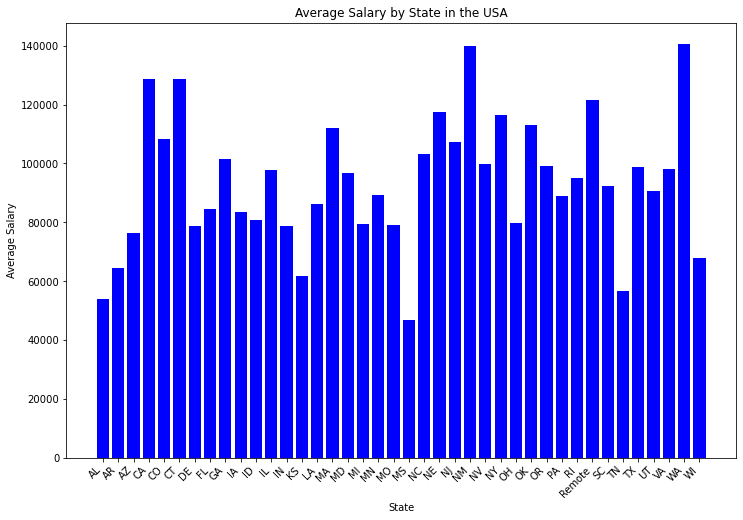

In [44]:
plt.figure(figsize=(12, 8))
plt.bar(df['Unfiltered_State'], df['salary'], color='blue')
plt.xlabel('State')
plt.ylabel('Average Salary')
plt.title('Average Salary by State in the USA')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()